In [1]:
import data_mining as dm
from lstm_autoencoder import RecurrentAutoencoder
import train
import numpy as np
import torch
import importlib

In [2]:
importlib.reload(dm)
#importlib.reload(RecurrentAutoencoder)
importlib.reload(train)

<module 'train' from 'c:\\Users\\52333\\Documents\\Cybersecurity\\train.py'>

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

Limpiamos la data y la dejamos en el formato necesario para entrenar
====================================================================

In [4]:
train_dataset,seq_len,n_features,val_dataset=dm.clean_and_get_Data('test2.csv')

(267, 5)


c:\Users\52333\Documents\Cybersecurity\data_mining.py:51: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Source'] = df['Source'].str.replace('.', '')
c:\Users\52333\Documents\Cybersecurity\data_mining.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Destination'] = df['Destination'].str.replace('.', '')


In [5]:
print(len(train_dataset))

226


Creamos el modelo
================

In [6]:
model = RecurrentAutoencoder(seq_len, n_features,128)
#model = model.to(device)

Entrenamos
==========

In [7]:
model, history = train.train_model(
  model, 
  train_dataset, 
  val_dataset, 
  n_epochs=100
)

Epoch 1: train loss 2.0306393720407403 val loss 1.7209667881553092
Epoch 2: train loss 1.4393543468508045 val loss 1.1211498295992948
Epoch 3: train loss 1.105281616272652 val loss 1.0333395139052626
Epoch 4: train loss 1.0089751161568987 val loss 0.9437886172633493
Epoch 5: train loss 1.1629789446571233 val loss 0.9033881075094256
Epoch 6: train loss 0.6925946856494498 val loss 0.5616441341430953
Epoch 7: train loss 0.42944976763255827 val loss 0.40177533068181426
Epoch 8: train loss 0.3434128412169165 val loss 0.33979377682121953
Epoch 9: train loss 0.3209400696234893 val loss 0.37684394360593193
Epoch 10: train loss 0.2940908841525031 val loss 0.31022273200783834
Epoch 11: train loss 0.2845857398073494 val loss 0.3221596395701505
Epoch 12: train loss 0.27772245353368 val loss 0.30264663106102624
Epoch 13: train loss 0.27576636748833466 val loss 0.24203200765958663
Epoch 14: train loss 0.2570976137257783 val loss 0.2225623034108221
Epoch 15: train loss 0.20894673240857314 val loss 0.

In [8]:
MODEL_PATH = 'model.pth'

torch.save(model, MODEL_PATH)

In [13]:
from torch import nn
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

C:\Users\52333\AppData\Local\Temp\ipykernel_13144\2828376390.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(losses, bins=50, kde=True);


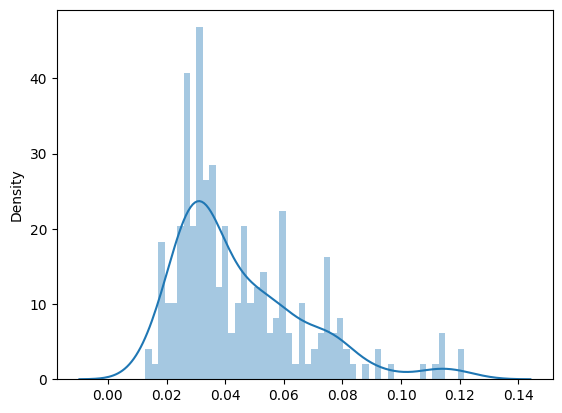

In [14]:
import seaborn as sns
from torch import nn
_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True);

In [15]:
THRESHOLD = 0.14

In [17]:
anomaly_dataset,Aseq_len,An_features,Aval_dataset=dm.clean_and_get_Data('spoofing_1.csv')

(1685, 5)


c:\Users\52333\Documents\Cybersecurity\data_mining.py:51: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Source'] = df['Source'].str.replace('.', '')
c:\Users\52333\Documents\Cybersecurity\data_mining.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Destination'] = df['Destination'].str.replace('.', '')


C:\Users\52333\AppData\Local\Temp\ipykernel_13144\2222098121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_losses, bins=50, kde=True);


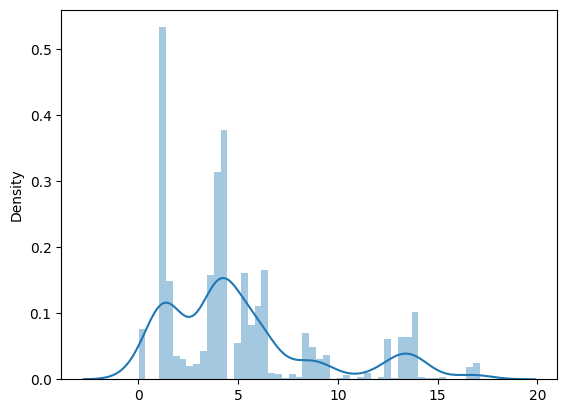

In [18]:
predictions, pred_losses = predict(model, anomaly_dataset)
sns.distplot(pred_losses, bins=50, kde=True);

In [19]:
correct = sum(l > THRESHOLD for l in pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anomaly_dataset)}')

Correct anomaly predictions: 1395/1432
